In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from numpy.random import RandomState
from scipy import stats
from permute.core import one_sample
from utils import *

prng = RandomState(42)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

FIG_FOLDER = 'figures/tweet_threshold_effects'

# Calculate and plot robustness of effects to tweet threshold 

In [2]:
# Load data
df = load_to_df('data/twitter_data.json')
df = df[df['shown_to_user']==True].reset_index(drop=True)
df

100%|██████████| 1730/1730 [00:04<00:00, 429.07it/s]


,timeline,rank,prob_in_tl,user_id,user_summary_leaning,collected_at,shown_to_user,user_race,user_ethnicity,user_gender,...,full_text_len,tweet_age,partisanship,outgroup_animosity,outgroup_animosity_to_ingroup,outgroup_animosity_to_outgroup,ingroup_affect,outgroup_affect,user_time_key,user_summary_race
0,Engagement,1.0,1.000000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,23,1064.087217,0.0,0,0,0,0.0,0.0,341_2023-02-11 17:05:08.233,White
1,Stated Preference,NaN,0.625000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,23,1064.087217,0.0,0,0,0,0.0,0.0,341_2023-02-11 17:05:08.233,White
2,Stated Preference with Downranking,NaN,0.625000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,23,1064.087217,0.0,0,0,0,0.0,0.0,341_2023-02-11 17:05:08.233,White
3,Engagement,2.0,1.000000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,136,501.270550,1.0,1,0,1,-1.0,-1.0,341_2023-02-11 17:05:08.233,White
4,Engagement,3.0,1.000000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,56,1195.270550,0.0,0,0,0,0.0,0.0,341_2023-02-11 17:05:08.233,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93045,Stated Preference,NaN,0.555556,165,-1,2023-02-28 05:55:47.757,True,[Asian],[None of these],Man,...,217,355.095950,0.0,0,0,0,0.0,0.0,165_2023-02-28 05:55:47.757,Asian or Native Hawaiian/other Pacific Islander
93046,Stated Preference with Downranking,NaN,0.555556,165,-1,2023-02-28 05:55:47.757,True,[Asian],[None of these],Man,...,217,355.095950,0.0,0,0,0,0.0,0.0,165_2023-02-28 05:55:47.757,Asian or Native Hawaiian/other Pacific Islander
93047,Chronological,10.0,1.000000,165,-1,2023-02-28 05:55:47.757,True,[Asian],[None of these],Man,...,86,201.162617,0.0,0,0,0,0.0,0.0,165_2023-02-28 05:55:47.757,Asian or Native Hawaiian/other Pacific Islander
93048,Stated Preference,NaN,0.555556,165,-1,2023-02-28 05:55:47.757,True,[Asian],[None of these],Man,...,86,201.162617,0.0,0,0,0,0.0,0.0,165_2023-02-28 05:55:47.757,Asian or Native Hawaiian/other Pacific Islander


In [3]:
# Calculate effects for engagement timeline
eng_effects_5 = get_effects(df, Timeline.ENGAGEMENT, 5)
eng_effects_6 = get_effects(df, Timeline.ENGAGEMENT, 6)
eng_effects_7 = get_effects(df, Timeline.ENGAGEMENT, 7)
eng_effects_8 = get_effects(df, Timeline.ENGAGEMENT, 8)
eng_effects_9 = get_effects(df, Timeline.ENGAGEMENT, 9)
eng_effects_10 = get_effects(df, Timeline.ENGAGEMENT, 10)

/Users/micah/Developer/Research Code/twitter-analysis/utils.py:426: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["user_time_key", "timeline"])[keys].agg(**aggregations)
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:437: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return grouped.groupby(["user_id", "timeline"]).mean()
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:794: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

In [4]:
# Add in rank column
eng_effects_5['Rank'] = 5
eng_effects_6['Rank'] = 6
eng_effects_7['Rank'] = 7
eng_effects_8['Rank'] = 8
eng_effects_9['Rank'] = 9
eng_effects_10['Rank'] = 10

In [5]:
# Create groupings for individual graphs.
reader_prefs = ["Reader pref (political)", "Reader pref (overall)"]
animosity = ['Out-group animosity']
partisanship = ['Partisanship']


outgroup_perception = [ 'Out-group perception (right users)',  'Out-group perception (left users)',  'Out-group perception']
ingroup_perception = [ 'In-group perception (right users)',  'In-group perception (left users)', 'In-group perception']

reader_political = ['Reader happy (political)', 'Reader anxious (political)', 'Reader sad (political)', 'Reader angry (political)']
author_political =  ['Author happy (political)', 'Author anxious (political)', 'Author sad (political)', 'Author angry (political)']
reader_overall = ['Reader happy (overall)', 'Reader anxious (overall)', 'Reader sad (overall)', 'Reader angry (overall)']
author_overall = [ 'Author happy (overall)', 'Author anxious (overall)', 'Author sad (overall)', 'Author angry (overall)']

In [6]:
eng_effects_combined = pd.concat([eng_effects_5, eng_effects_6, eng_effects_7, eng_effects_8, eng_effects_9, eng_effects_10])
eng_effects_combined['Outcome'] = eng_effects_combined['Outcome'].apply(lambda x: x[0] + x[1:].lower())

In [7]:
eng_effects_combined = eng_effects_combined.set_index('Outcome')
rank = eng_effects_combined['Rank'].unique()

In [8]:
plt.rcParams["mathtext.fontset"] = "cm"

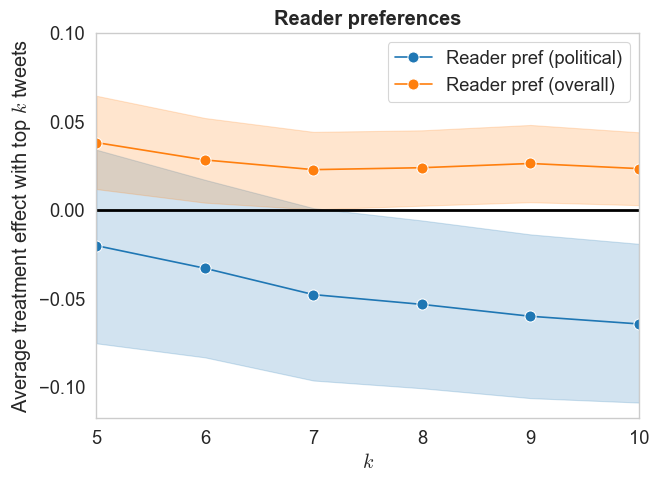

In [9]:
general_group = reader_prefs
fig, ax = plt.subplots(figsize=(7, 5))


lplot = sns.lineplot(data = eng_effects_combined.loc[general_group], x='Rank', y='Unstandardized Effect', hue=list(eng_effects_combined.loc[general_group].index.values), ax=ax, marker="o", markersize=8)
lplot.axhline(0,color='black', linewidth=2)
ax.margins(x=0)
plt.legend()
ax.set_title("Reader preferences", fontweight="bold")
ax.set_xlabel(r'$k$')
ax.set_ylabel(r"Average treatment effect with top $k$ tweets")
ax.fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], color=list(sns.color_palette())[0], alpha=0.2, label='Confidence Interval')
ax.fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], color=list(sns.color_palette())[1], alpha=0.2, label='Confidence Interval')
ax.set_yticks(np.arange(-.1, .11, .05))
ax.grid(False)
plt.savefig(f"{FIG_FOLDER}/reader_prefs.pdf", bbox_inches='tight')

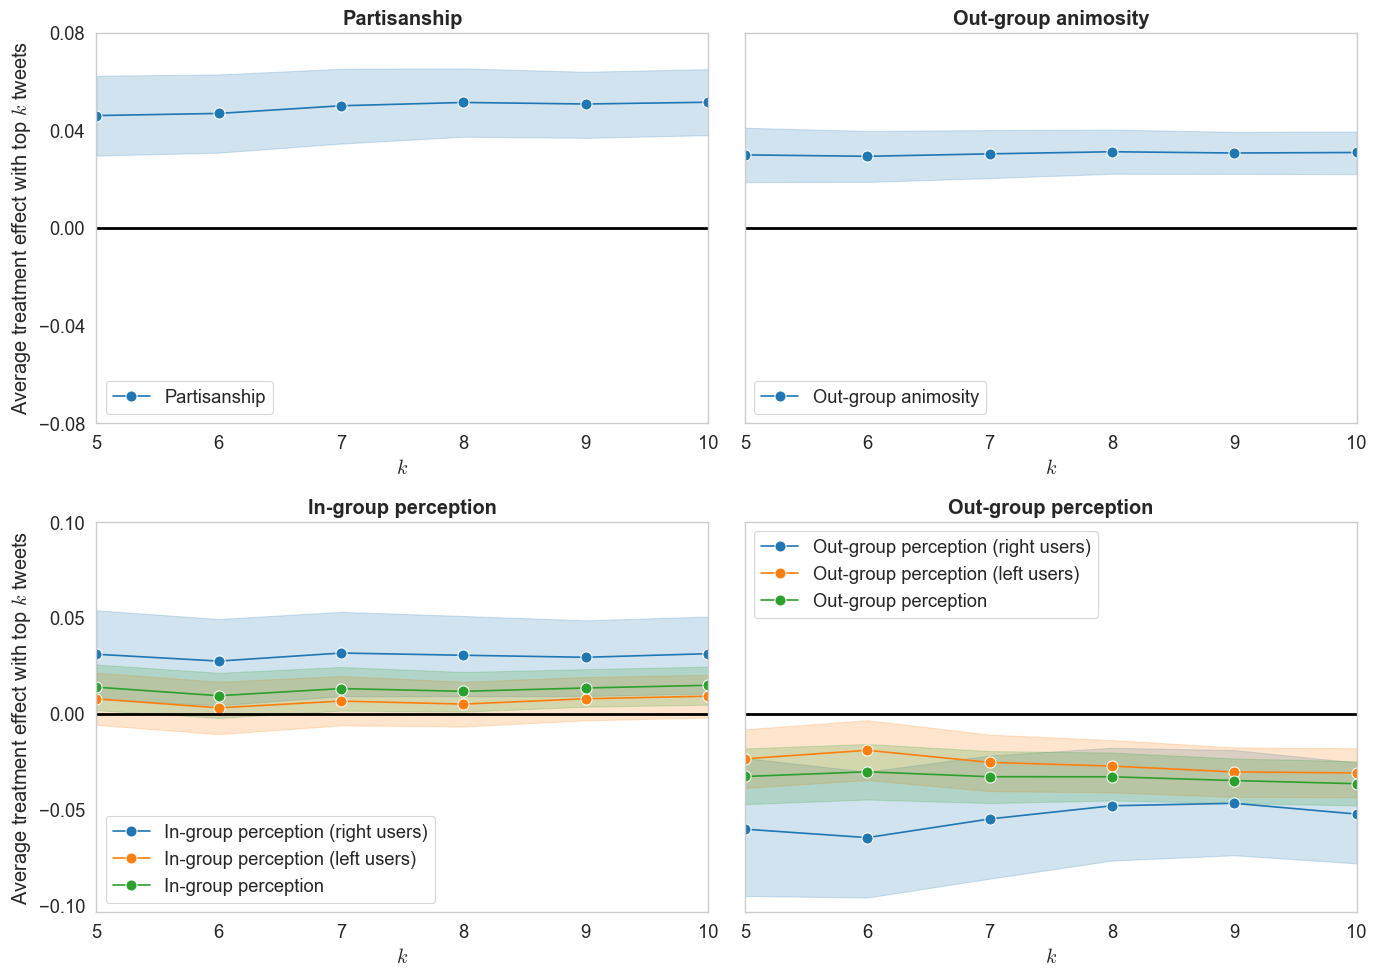

In [10]:

fix, axes = plt.subplots(2, 2, figsize=(14, 10), sharey='row')
axes = np.append(axes[0], axes[1])

general_group = animosity
lplot = sns.lineplot(data = eng_effects_combined.loc[general_group], x='Rank', y='Unstandardized Effect', hue=list(eng_effects_combined.loc[general_group].index.values), ax=axes[1], marker="o", markersize=8)
lplot.axhline(0, color='black', linewidth=2)

axes[1].legend(loc='lower left')
axes[1].set_title("Out-group animosity", fontweight="bold")
axes[1].set_xlabel(r"$k$")
axes[1].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], color=list(sns.color_palette())[0], alpha=0.2, label='Confidence Interval')
general_group = partisanship

lplot = sns.lineplot(data = eng_effects_combined.loc[general_group], x='Rank', y='Unstandardized Effect', hue=list(eng_effects_combined.loc[general_group].index.values), ax=axes[0], marker="o", markersize=8)
lplot.axhline(0, color='black', linewidth=2)

axes[0].legend(loc='lower left')
axes[0].set_title("Partisanship",  fontweight="bold")
axes[0].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], color=list(sns.color_palette())[0], alpha=0.2, label='Confidence Interval')
axes[0].set_xlabel(r"$k$")
axes[0].set_ylabel(r'Average treatment effect with top $k$ tweets')
axes[0].set_yticks(np.arange(-.08, .081, .04))

general_group = ingroup_perception

lplot= sns.lineplot(data = eng_effects_combined.loc[general_group], x='Rank', y='Unstandardized Effect', hue=list(eng_effects_combined.loc[general_group].index.values), ax=axes[2], marker="o", markersize=8)
lplot.axhline(0,color='black', linewidth=2)

axes[2].legend(loc='lower left')
axes[2].set_title("In-group perception",  fontweight="bold")
axes[2].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], color=list(sns.color_palette())[0], alpha=0.2, label='Confidence Interval')
axes[2].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], color=list(sns.color_palette())[1], alpha=0.2, label='Confidence Interval')
axes[2].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], color=list(sns.color_palette())[2], alpha=0.2, label='Confidence Interval')
axes[2].set_xlabel(r"$k$")
axes[2].set_ylabel(r"Average treatment effect with top $k$ tweets")
general_group = outgroup_perception

lplot= sns.lineplot(data = eng_effects_combined.loc[general_group], x='Rank', y='Unstandardized Effect', hue=list(eng_effects_combined.loc[general_group].index.values), ax=axes[3], marker="o", markersize=8)
lplot.axhline(0, color='black', linewidth=2)

axes[3].legend(loc='upper left')
axes[3].set_title("Out-group perception",  fontweight="bold")
axes[3].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], color=list(sns.color_palette())[0], alpha=0.2, label='Confidence Interval')
axes[3].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], color=list(sns.color_palette())[1], alpha=0.2, label='Confidence Interval')
axes[3].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], color=list(sns.color_palette())[2], alpha=0.2, label='Confidence Interval')
axes[3].set_ylabel(None)
axes[3].set_xlabel(r"$k$")
axes[3].set_yticks(np.arange(-.1, .11, .05))

axes[0].margins(x=0)
axes[1].margins(x=0)
axes[2].margins(x=0)
axes[3].margins(x=0)

# sns.despine()
axes[0].grid(False)
axes[1].grid(False)
axes[2].grid(False)
axes[3].grid(False)

plt.tight_layout()
plt.savefig(f"{FIG_FOLDER}/political_effects.pdf", bbox_inches='tight')

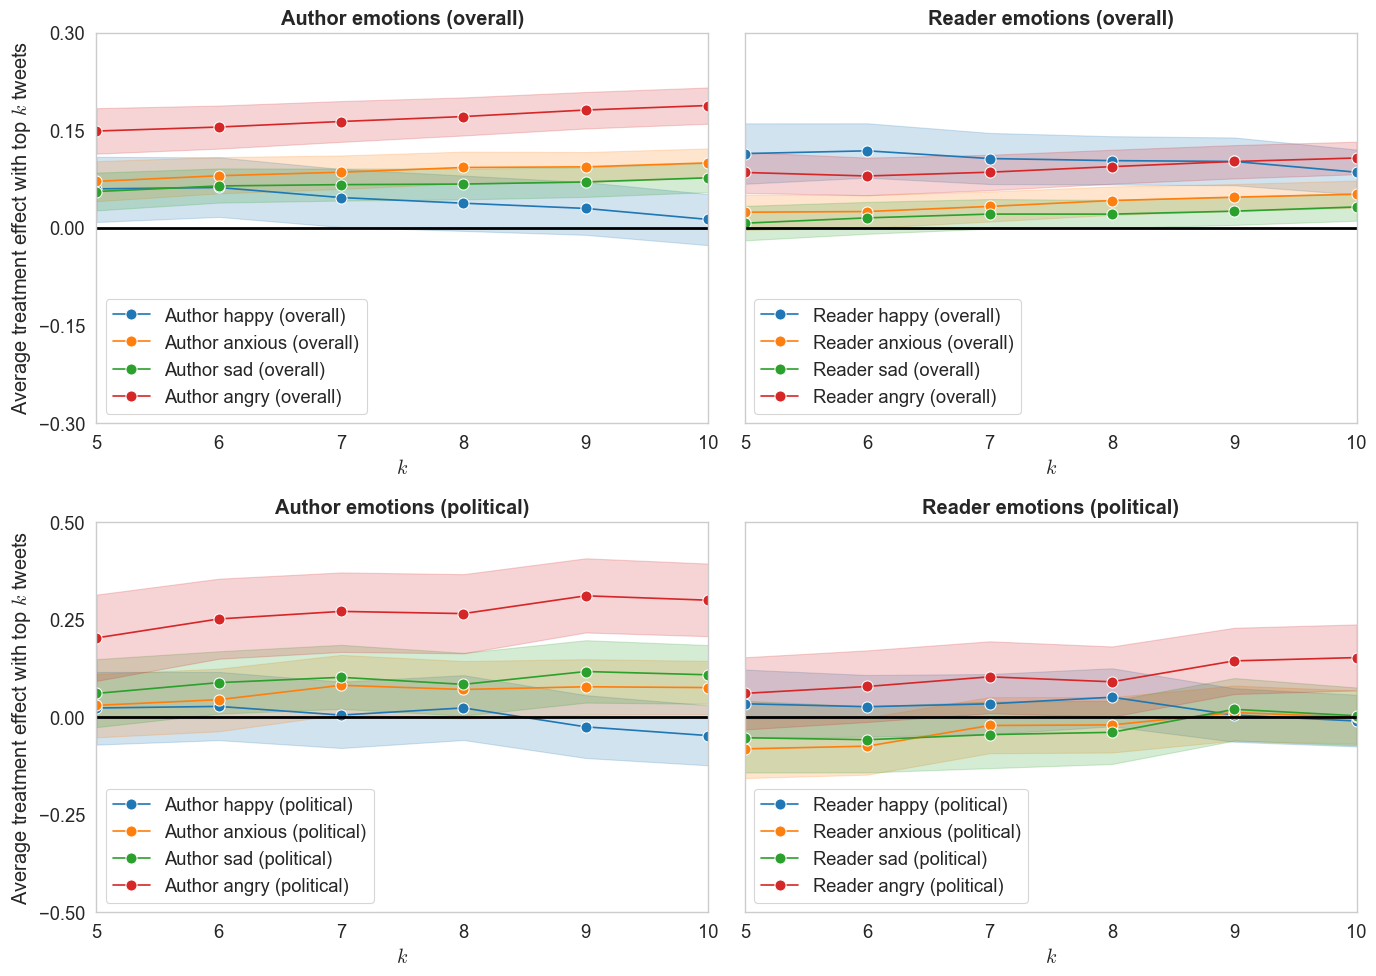

In [11]:
# Emotion graphs
fix, axes = plt.subplots(2, 2, figsize=(14, 10), sharey='row')
axes = np.append(axes[0], axes[1])

general_group = reader_political
lplot = sns.lineplot(data = eng_effects_combined.loc[general_group], x='Rank', y='Unstandardized Effect', hue=list(eng_effects_combined.loc[general_group].index.values), ax=axes[3], marker="o", markersize=8)
lplot.axhline(0, color='black', linewidth=2)

axes[3].legend(loc='lower left')
axes[3].set_title("Reader emotions (political)", fontweight="bold")
axes[3].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], color=list(sns.color_palette())[0], alpha=0.2, label='Confidence Interval')
axes[3].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], color=list(sns.color_palette())[1], alpha=0.2, label='Confidence Interval')
axes[3].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], color=list(sns.color_palette())[2], alpha=0.2, label='Confidence Interval')
axes[3].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[3]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[3]]], color=list(sns.color_palette())[3], alpha=0.2, label='Confidence Interval')
axes[3].set_xlabel(r"$k$")
general_group = author_political

lplot = sns.lineplot(data = eng_effects_combined.loc[general_group], x='Rank', y='Unstandardized Effect', hue=list(eng_effects_combined.loc[general_group].index.values), ax=axes[2], marker="o", markersize=8)
lplot.axhline(0, color='black', linewidth=2)

axes[2].legend(loc='lower left')
axes[2].set_title("Author emotions (political)",  fontweight="bold")
axes[2].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], color=list(sns.color_palette())[0], alpha=0.2, label='Confidence Interval')
axes[2].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], color=list(sns.color_palette())[1], alpha=0.2, label='Confidence Interval')
axes[2].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], color=list(sns.color_palette())[2], alpha=0.2, label='Confidence Interval')
axes[2].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[3]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[3]]], color=list(sns.color_palette())[3], alpha=0.2, label='Confidence Interval')
axes[2].set_xlabel(r"$k$")
axes[2].set_ylabel(r"Average treatment effect with top $k$ tweets")
axes[2].set_yticks(np.arange(-.5, .51, .25))

general_group = reader_overall

lplot= sns.lineplot(data = eng_effects_combined.loc[general_group], x='Rank', y='Unstandardized Effect', hue=list(eng_effects_combined.loc[general_group].index.values), ax=axes[1], marker="o", markersize=8)
lplot.axhline(0,color='black', linewidth=2)

axes[1].legend(loc='lower left')
axes[1].set_title("Reader emotions (overall)",  fontweight="bold")
axes[1].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], color=list(sns.color_palette())[0], alpha=0.2, label='Confidence Interval')
axes[1].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], color=list(sns.color_palette())[1], alpha=0.2, label='Confidence Interval')
axes[1].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], color=list(sns.color_palette())[2], alpha=0.2, label='Confidence Interval')
axes[1].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[3]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[3]]], color=list(sns.color_palette())[3], alpha=0.2, label='Confidence Interval')
axes[1].set_xlabel(r"$k$")
axes[1].set_ylabel(None)
general_group = author_overall

lplot= sns.lineplot(data = eng_effects_combined.loc[general_group], x='Rank', y='Unstandardized Effect', hue=list(eng_effects_combined.loc[general_group].index.values), ax=axes[0], marker="o", markersize=8)
lplot.axhline(0, color='black', linewidth=2)

axes[0].legend(loc='lower left')
axes[0].set_title("Author emotions (overall)",  fontweight="bold")
axes[0].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[0]]], color=list(sns.color_palette())[0], alpha=0.2, label='Confidence Interval')
axes[0].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[1]]], color=list(sns.color_palette())[1], alpha=0.2, label='Confidence Interval')
axes[0].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[2]]], color=list(sns.color_palette())[2], alpha=0.2, label='Confidence Interval')
axes[0].fill_between(rank, [eff[0] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[3]]], [eff[1] for eff in eng_effects_combined['Confidence Interval (unstandardized)'].loc[general_group[3]]], color=list(sns.color_palette())[3], alpha=0.2, label='Confidence Interval')
axes[0].set_xlabel(r"$k$")
axes[0].set_ylabel(r"Average treatment effect with top $k$ tweets")
axes[0].set_yticks(np.arange(-.3, .31, .15))

axes[0].margins(x=0)
axes[1].margins(x=0)
axes[2].margins(x=0)
axes[3].margins(x=0)

axes[0].grid(False)
axes[1].grid(False)
axes[2].grid(False)
axes[3].grid(False)


plt.tight_layout()
plt.savefig(f"{FIG_FOLDER}/emotion_effects.pdf", bbox_inches='tight')